In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [132]:
# Load dataset
df = pd.read_csv("__Final_Structured_Crypto_Data.csv")
df['Time'] = pd.to_datetime(df['Time'])
df = df.dropna(subset=['Close'])
df['Symbol'] = df['Symbol'].str.upper().str.strip()

In [134]:
def prepare_lstm_data(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)


Training LSTM for BTC...


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


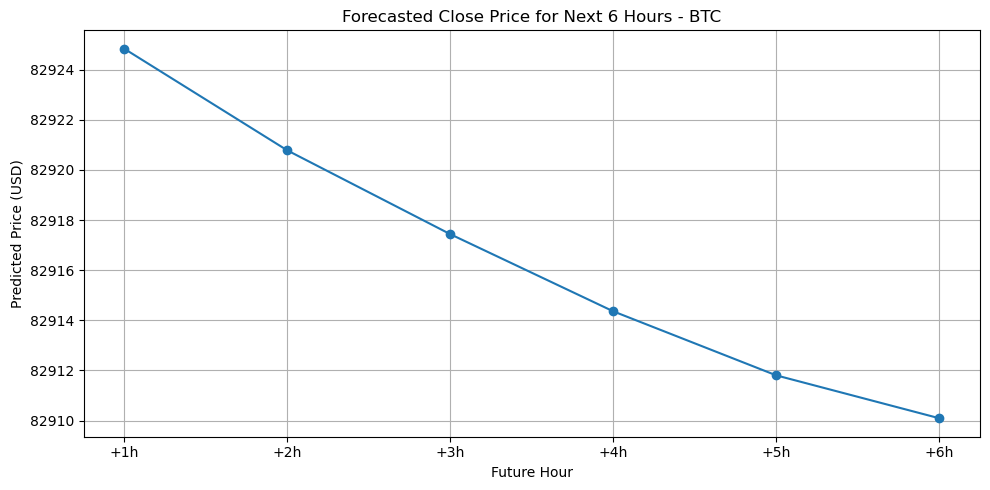


Training LSTM for ETH...


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


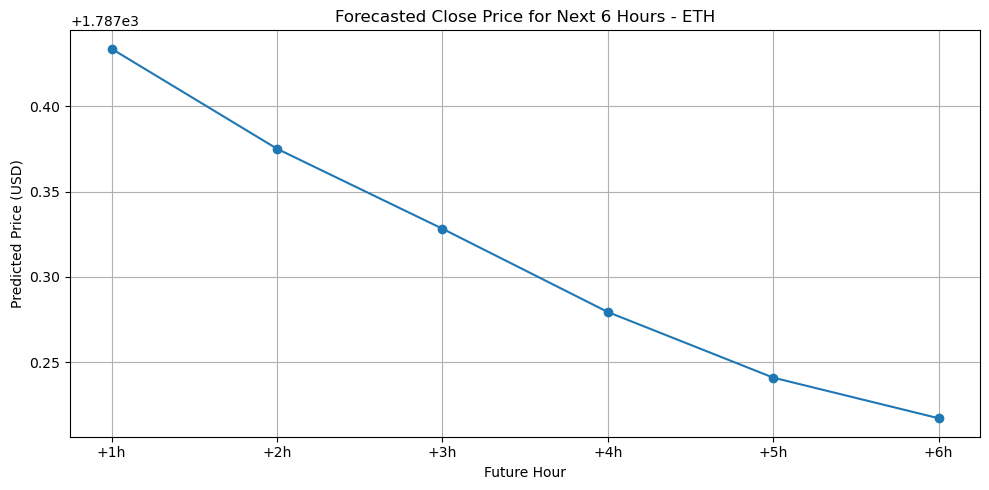


Training LSTM for XRP...


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


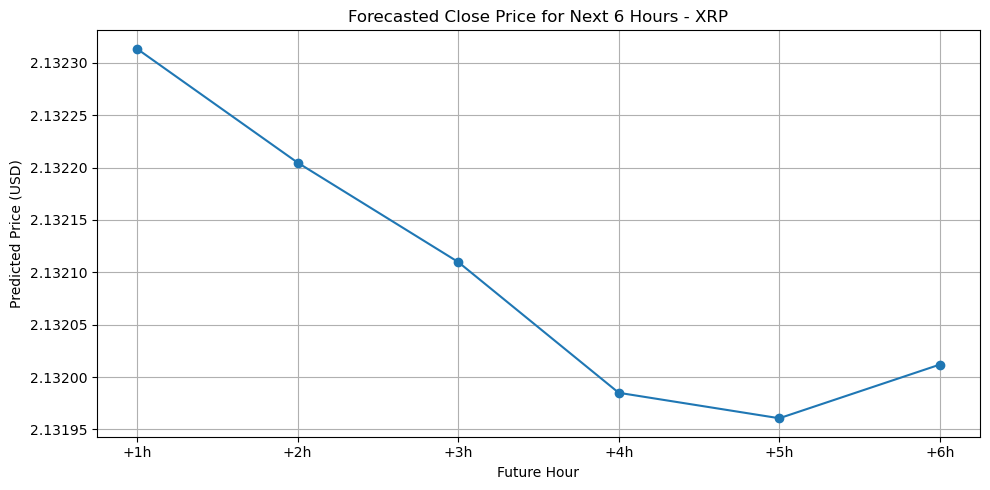


Training LSTM for ADA...


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


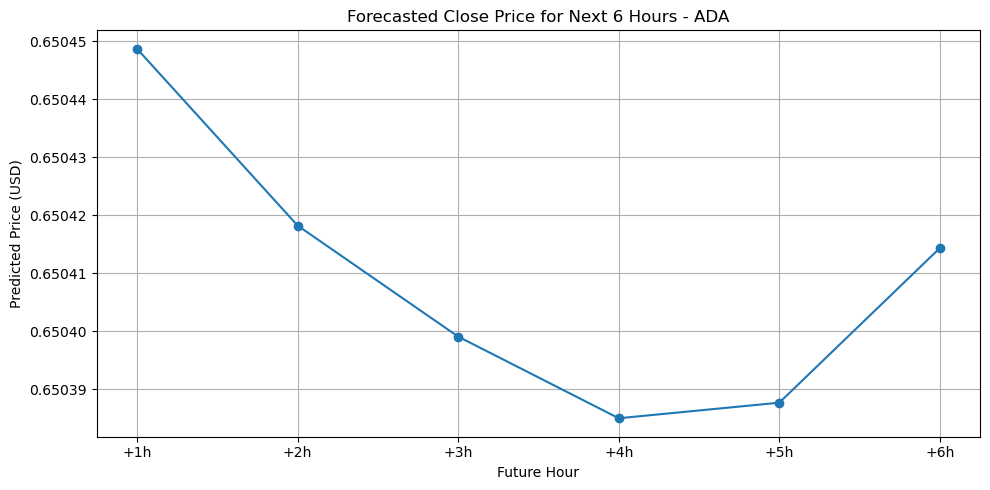


Training LSTM for DOGE...


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


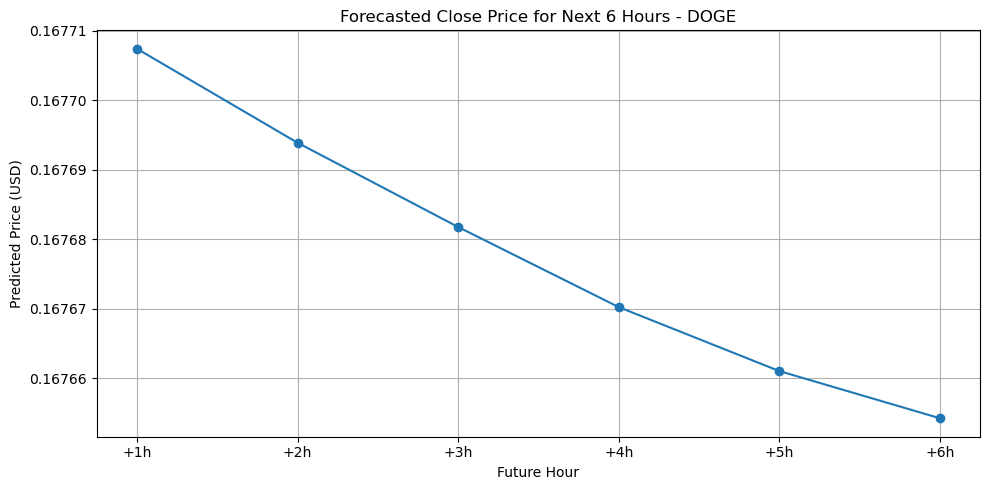

In [136]:
window_size = 24
coins = df['Symbol'].unique()

for coin in coins:
    print(f"\nTraining LSTM for {coin}...")
    coin_df = df[df['Symbol'] == coin].sort_values(by='Time')
    prices = coin_df['Close'].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    scaled_prices = scaler.fit_transform(prices)

    X, y = prepare_lstm_data(scaled_prices, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    model = Sequential([
        LSTM(50, activation='relu', input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=20, verbose=0)

    # Forecast next 6 hours
    input_seq = scaled_prices[-window_size:]
    predictions = []
    for _ in range(6):
        inp = input_seq.reshape((1, window_size, 1))
        pred = model.predict(inp, verbose=0)[0][0]
        predictions.append(pred)
        input_seq = np.append(input_seq[1:], [[pred]], axis=0)

    forecasted = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Plot
    hours = [f'+{i}h' for i in range(1, 7)]
    plt.figure(figsize=(10, 5))
    plt.plot(hours, forecasted, marker='o')
    plt.title(f"Forecasted Close Price for Next 6 Hours - {coin}")
    plt.xlabel("Future Hour")
    plt.ylabel("Predicted Price (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()